In [13]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from kornia.geometry.depth import depth_to_normals
import torchvision.transforms as F
trans = F.ToTensor()

In [19]:
path_to_data = r"C:\Users\WP\Desktop\_TUM_SEMESTER_4\AT3DCV\ABLATIONS_DATA"
folder = "ABLATIONS_rgb_xolp_normals"
frame = "8"
mode_gt = "depth_gt"
mode_pred = "depth_pred"
mode_ngt = "normals_gt"
mode_npred = "normals_pred"
path_to_read_rgb = r"{0}\{1}\rgb\{2}.png".format(path_to_data, folder, frame)
path_to_read_gt = r"{0}\{1}\{2}\{3}.png".format(path_to_data, folder, mode_gt, frame)
path_to_read_pred = r"{0}\{1}\{2}\{3}.png".format(path_to_data, folder, mode_pred, frame)
path_to_read_ngt = r"{0}\{1}\{2}\{3}.png".format(path_to_data, folder, mode_ngt, frame)
path_to_read_npred = r"{0}\{1}\{2}\{3}.png".format(path_to_data, folder, mode_npred, frame)
path_to_mask = r"{0}\{1}\mask\{2}.png".format(path_to_data, folder, frame)

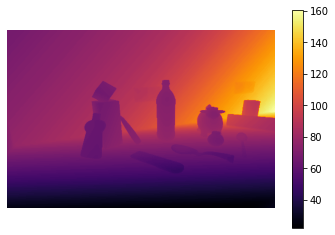

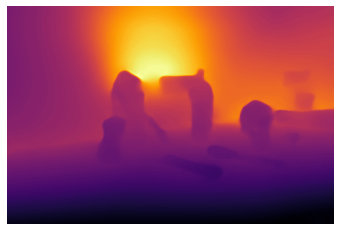

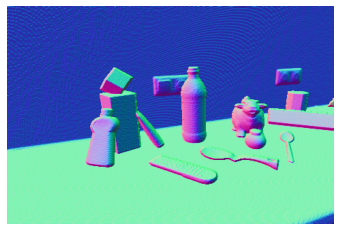

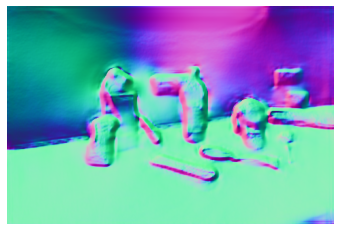

In [20]:
depth_gt = cv2.imread(path_to_read_gt, cv2.IMREAD_GRAYSCALE)
depth_pred = cv2.imread(path_to_read_pred, cv2.IMREAD_GRAYSCALE)
normals_gt = cv2.imread(path_to_read_ngt, cv2.IMREAD_UNCHANGED)
normals_gt = cv2.cvtColor(normals_gt, cv2.COLOR_BGR2RGB)
normals_pred = cv2.imread(path_to_read_npred, cv2.IMREAD_UNCHANGED)
normals_pred = cv2.cvtColor(normals_pred, cv2.COLOR_BGR2RGB)
rgb = cv2.imread(path_to_read_rgb, cv2.IMREAD_UNCHANGED)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
depth_gt_scaled = depth_gt / 255 * 190
plt.imshow(depth_gt_scaled, cmap='inferno')
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(depth_pred, cmap='inferno')
plt.axis('off')
plt.show()
plt.imshow(normals_gt)
plt.axis('off')
plt.show()
plt.imshow(normals_pred)
plt.axis('off')
plt.show()

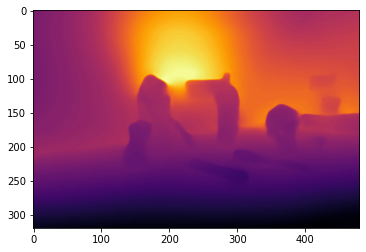

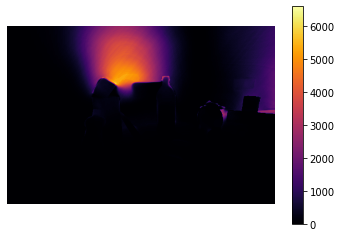

In [21]:
depth_gt = depth_gt
depth_pred = depth_pred
depth_gt = depth_gt.astype(np.int16)
depth_pred = depth_pred.astype(np.int16)
plt.imshow(depth_pred, 'inferno')
plt.show()
diff = depth_gt - depth_pred
rms = diff**2 / 255 * 190 / 255 * 190
plt.imshow(rms, 'inferno')
plt.colorbar()
plt.axis('off')
plt.show()

In [26]:
# mask = cv2.imread(path_to_mask, cv2.IMREAD_GRAYSCALE)
# for num in np.unique(mask):
#     print(num)
#     new_rgb = rgb/255
#     new_mask = np.zeros((mask.shape))
#     for i in range(mask.shape[0]):
#         for j in range(mask.shape[1]):
#             if mask[i,j]==num:
#                 new_mask[i,j] = 1.0
#     transparency = 0.4
#     new_mask *= transparency
#     new_mask = new_mask[..., None]
#     blue = np.ones(rgb.shape)*(0,0,1)
#     out = (blue*new_mask + new_rgb*(1.0-new_mask))
#     plt.imshow(out)
#     plt.show()

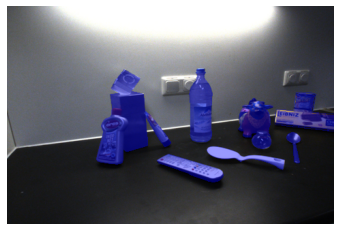

In [27]:
new_rgb = rgb/255
new_mask = np.zeros((mask.shape))
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] < 190 and mask[i,j] > 20:
            new_mask[i,j] = 1.0
transparency = 0.4
new_mask *= transparency
new_mask = new_mask[..., None]
blue = np.ones(rgb.shape)*(0,0,1)
out = (blue*new_mask + new_rgb*(1.0-new_mask))

plt.imshow(out)
plt.axis('off')
plt.show()